In [1]:
import pandas as pd
df=pd.read_csv("H2HBABBA2008.csv") 
#loading dataset

import warnings
warnings.filterwarnings('ignore') 

In [2]:
import sklearn 
#sklearn for test-train-validation split

In [3]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200706844,WINC,NaN,2020.0,1.930739e+09,2020-04-03,20200403,20200403,20200418.0,USD,RV,1.0,NaN,31706.67,20200403.0,NAA8,1.930739e+09,1
1,U001,CCCA02,KRAFT corp,2019-11-27 00:00:00,2019.0,1.930049e+09,2019-10-25,20191024,20191025,20191129.0,USD,RV,1.0,NaN,18748.97,20191025.0,NAG2,1.930049e+09,0
2,U001,0200942148,BRADY corp,2019-04-12 00:00:00,2019.0,1.928752e+09,2019-02-06,20190206,20190206,20190308.0,USD,RV,1.0,NaN,14688.00,20190206.0,NAD5,1.928752e+09,0
3,U001,0200781803,JRD in,2020-01-27 00:00:00,2020.0,1.930372e+09,2020-01-07,20200108,20200107,20200127.0,USD,RV,1.0,NaN,481.62,20200107.0,NAD1,1.930372e+09,0
4,CA02,0140104409,LOB corp,2020-02-14 00:00:00,2020.0,2.960612e+09,2020-02-03,20200203,20200203,20200213.0,CAD,RV,1.0,NaN,157919.28,20200203.0,CA10,2.960612e+09,0


# Data Prepocessing 

In [4]:
df.drop_duplicates(inplace=True) #dropping duplicates

In [5]:
#dropping columns which have constant values.
df.drop(['document type', 'posting_id','posting_date','document_create_date','area_business','document type'], axis=1,inplace=True)

In [6]:
df['clear_date']=pd.to_datetime(df.clear_date) #converting into datetime format

In [7]:
df.drop(df[df['invoice_id'].isnull()==True].index, inplace = True) #dropping rows which has null values from invoice_id
  
    

In [8]:
df['invoice_id'].isnull().sum()

0

In [9]:
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')

In [10]:
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')

In [11]:
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')

In [12]:
df['doc_id'] = df['doc_id'].astype('str') 

In [13]:
df['invoice_id'] = df['invoice_id'].astype('str')

In [14]:
df['buisness_year']=pd.to_datetime(df['buisness_year'],format='%Y').dt.year

# Creating main train and main test

In [15]:
new_train=df[df['clear_date'].notnull()].copy() #clear date having values in new_train

new_test=df[df['clear_date'].isnull()].copy() #clear date having null values in new_test

In [16]:
new_train.to_csv("new_train.csv")
new_test.to_csv("new_test.csv")

In [17]:
new_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,CCCA02,KRAFT corp,2019-11-27,2019,1930049415.0,2019-10-25,2019-11-29,USD,18748.97,2019-10-25,NAG2,1930049415.0,0
2,U001,0200942148,BRADY corp,2019-04-12,2019,1928751738.0,2019-02-06,2019-03-08,USD,14688.00,2019-02-06,NAD5,1928751738.0,0
3,U001,0200781803,JRD in,2020-01-27,2020,1930371911.0,2020-01-07,2020-01-27,USD,481.62,2020-01-07,NAD1,1930371911.0,0
4,CA02,0140104409,LOB corp,2020-02-14,2020,2960611665.0,2020-02-03,2020-02-13,CAD,157919.28,2020-02-03,CA10,2960611665.0,0
5,U001,0200726979,BJ'S foundation,2020-02-10,2020,1930440418.0,2020-01-25,2020-02-09,USD,175.39,2020-01-25,NAA8,1930440418.0,0


In [18]:
new_train.dtypes #checking for datatypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                            object
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                        object
isOpen                             int64
dtype: object

In [19]:
new_train.isnull().sum() #checking for null values in all the columns

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

# Creating a Target Variable to store delays

In [20]:
new_train["Target"]=(new_train["clear_date"]-new_train["due_in_date"]) #creating a Target column to store the delay.

In [21]:
new_train["Target"]=new_train.Target.apply(lambda x: x.days) #converting Target datatype into integer format

In [22]:

new_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                            object
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                        object
isOpen                             int64
Target                             int64
dtype: object

In [23]:
new_train.sort_values(by=["document_create_date.1"],inplace=True) #sorting the document create date.1 column

In [24]:
new_train=new_train.reset_index(drop=True) #reset the index after sorting

In [25]:
new_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,U001,0200786288,FAMILY systems,2019-01-11,2019,1928538223.0,2018-12-30,2019-01-14,USD,9388.77,2018-12-30,NAA8,1928538223.0,0,-3
1,U001,0200744019,TARG corp,2019-01-22,2019,1928534323.0,2018-12-30,2019-01-14,USD,48157.20,2018-12-30,NAA8,1928534323.0,0,8
2,U001,0200769623,WAL-MAR associates,2019-01-09,2019,1928532797.0,2018-12-30,2019-01-14,USD,2710.55,2018-12-30,NAH4,1928532797.0,0,-5
3,U001,0200759878,SA systems,2019-01-15,2019,1928533704.0,2018-12-30,2019-01-14,USD,13524.16,2018-12-30,NAH4,1928533704.0,0,1
4,U013,0140103293,SUPERV foundation,2019-02-01,2019,1991819556.0,2018-12-30,2019-01-29,USD,2053.80,2018-12-30,NAVE,1991819556.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39119,U001,0200721330,PARK corp,2020-03-12,2020,1930576789.0,2020-02-27,2020-03-08,USD,77434.89,2020-02-27,NA10,1930576789.0,0,4
39120,U001,0200956366,RICH corp,2020-03-06,2020,1930580390.0,2020-02-27,2020-03-13,USD,51919.56,2020-02-27,NAA8,1930580390.0,0,-7
39121,U001,0200943275,US llc,2020-03-13,2020,1930580919.0,2020-02-27,2020-03-13,USD,37837.60,2020-02-27,NAA8,1930580919.0,0,0
39122,U001,0200759878,SA llc,2020-03-13,2020,1930571403.0,2020-02-27,2020-03-13,USD,79314.75,2020-02-27,NAH4,1930571403.0,0,0


# Test-Train-Validation

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function
# X --> contains the dataframe without the target i.e Delay
X = new_train.drop('Target',axis=1)
# y --> contains only the target value 
y = new_train['Target'] 
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)
X_train.shape , X_val.shape , X_test.shape

((27386, 14), (5869, 14), (5869, 14))

# EDA

<AxesSubplot:xlabel='Target', ylabel='Density'>

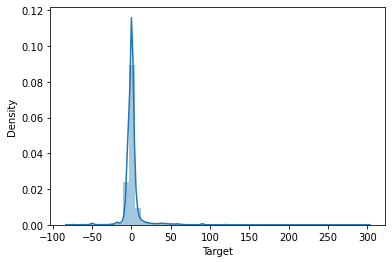

In [28]:
import seaborn as sns
sns.distplot(y_train)  
# distribution of the target column 
# since distribution is normal so outliers can be ignored

In [29]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,0,U001,0200786288,FAMILY systems,2019-01-11,2019,1928538223.0,2018-12-30,2019-01-14,USD,9388.77,2018-12-30,NAA8,1928538223.0,0,-3
1,1,U001,0200744019,TARG corp,2019-01-22,2019,1928534323.0,2018-12-30,2019-01-14,USD,48157.20,2018-12-30,NAA8,1928534323.0,0,8
2,2,U001,0200769623,WAL-MAR associates,2019-01-09,2019,1928532797.0,2018-12-30,2019-01-14,USD,2710.55,2018-12-30,NAH4,1928532797.0,0,-5
3,3,U001,0200759878,SA systems,2019-01-15,2019,1928533704.0,2018-12-30,2019-01-14,USD,13524.16,2018-12-30,NAH4,1928533704.0,0,1
4,4,U013,0140103293,SUPERV foundation,2019-02-01,2019,1991819556.0,2018-12-30,2019-01-29,USD,2053.80,2018-12-30,NAVE,1991819556.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27381,27381,U001,0200148860,DOLLA in,2019-10-24,2019,1929983358.0,2019-10-09,2019-10-24,USD,91321.68,2019-10-09,NAA8,1929983358.0,0,0
27382,27382,U001,0200895843,US,2019-10-25,2019,1929982047.0,2019-10-09,2019-10-24,USD,47700.18,2019-10-09,NAA8,1929982047.0,0,1
27383,27383,CA02,0140104340,COLABOR associates,2019-10-24,2019,2960585412.0,2019-10-09,2019-10-19,CAD,9408.35,2019-10-09,CA10,2960585412.0,0,5
27384,27384,U001,0200769623,WAL-MAR corporation,2019-10-21,2019,1929989281.0,2019-10-09,2019-10-24,USD,40621.81,2019-10-09,NAH4,1929989281.0,0,-3


<AxesSubplot:xlabel='Target', ylabel='document_create_date.1'>

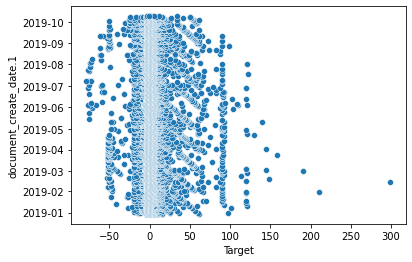

In [30]:
#No direct relationship
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Target", y="document_create_date.1")

<AxesSubplot:xlabel='Target', ylabel='total_open_amount'>

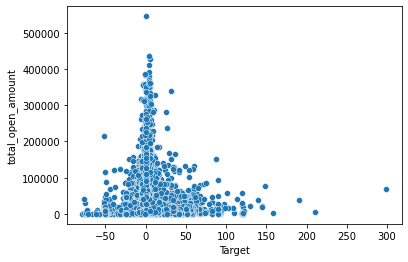

In [31]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Target", y="total_open_amount")

In [32]:
X_train.cust_number.nunique() #checking unique number of customer

1225

In [33]:
X_train.business_code.nunique()

6

In [34]:
X_train.merge(y_train,on = X_train.index).groupby(['cust_number','name_customer'])['Target'].agg(['mean']).unstack().T.idxmin()

cust_number
0100000048        (mean, GEOR foundation)
0100000158               (mean, CASC llc)
0100000217                 (mean, MRS S )
0100000222    (mean, SMITHFIE associates)
0100000272         (mean, WR corporation)
                         ...             
CC7455            (mean, HEIN foundation)
CCCA02          (mean, KRAFT  foundation)
CCU001                    (mean, KRAFT  )
CCU002                  (mean, KRFT FDS )
CCU013                 (mean, KRAFT F in)
Length: 1225, dtype: object

# Feature Engineering


In [35]:

X_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
33255,U001,0100031704,DELHAIZE us,2019-12-31,2019,1930256038.0,2019-12-11,2019-12-26,USD,102384.04,2019-12-11,NAA8,1930256038.0,0
33256,U001,0100001222,REST,2019-12-31,2019,1930265243.0,2019-12-11,2019-12-31,USD,1389.85,2019-12-11,NAD1,1930265243.0,0
33257,U001,0200769623,WAL-MAR systems,2019-12-23,2019,1930257221.0,2019-12-11,2019-12-26,USD,60739.39,2019-12-11,NAH4,1930257221.0,0
33258,U001,0200761734,H E BUT systems,2019-12-26,2019,1930262967.0,2019-12-11,2019-12-26,USD,75659.09,2019-12-11,NAA8,1930262967.0,0
33259,U001,0200769623,WAL-MAR corporation,2019-12-23,2019,1930256648.0,2019-12-11,2019-12-26,USD,37461.59,2019-12-11,NAH4,1930256648.0,0


In [36]:
from sklearn.preprocessing import LabelEncoder
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(df['name_customer'])
df['name_customer_encoder'] = name_customer_encoder.transform(df['name_customer'])

In [37]:
X_train['name_customer_encoder'] = name_customer_encoder.transform(X_train['name_customer'])

In [38]:
X_val['name_customer_encoder'] = name_customer_encoder.transform(X_val['name_customer'])
X_test['name_customer_encoder'] = name_customer_encoder.transform(X_test['name_customer'])

In [39]:
X_train[['name_customer_encoder','name_customer']]

,name_customer_encoder,name_customer
0,1240,FAMILY systems
1,3778,TARG corp
2,4079,WAL-MAR associates
3,3262,SA systems
4,3647,SUPERV foundation
...,...,...
27381,1102,DOLLA in
27382,3942,US
27383,763,COLABOR associates
27384,4082,WAL-MAR corporation


In [40]:
X_test[['name_customer_encoder','name_customer']]

,name_customer_encoder,name_customer
33255,1014,DELHAIZE us
33256,3152,REST
33257,4086,WAL-MAR systems
33258,1648,H E BUT systems
33259,4082,WAL-MAR corporation
...,...,...
39119,2867,PARK corp
39120,3185,RICH corp
39121,3949,US llc
39122,3261,SA llc


In [41]:
X_train.drop(['name_customer'], axis =1,inplace=True)
X_val.drop(['name_customer'],axis=1 , inplace=True)
X_test.drop(['name_customer'],axis=1 , inplace=True)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27386 entries, 0 to 27385
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27386 non-null  object        
 1   cust_number             27386 non-null  object        
 2   clear_date              27386 non-null  datetime64[ns]
 3   buisness_year           27386 non-null  int64         
 4   doc_id                  27386 non-null  object        
 5   document_create_date.1  27386 non-null  datetime64[ns]
 6   due_in_date             27386 non-null  datetime64[ns]
 7   invoice_currency        27386 non-null  object        
 8   total_open_amount       27386 non-null  float64       
 9   baseline_create_date    27386 non-null  datetime64[ns]
 10  cust_payment_terms      27386 non-null  object        
 11  invoice_id              27386 non-null  object        
 12  isOpen                  27386 non-null  int64 

In [43]:
# function will delete a column from train , val and test
def delete_col(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [44]:
def status_check(traindf = X_train,valdf = X_val,testdf = X_test):
    print(traindf.info())
    print("****************************")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("************Train Null Count****************")
    print(traindf.isna().sum())
    print("************Test Null Count ****************")
    print(testdf.isna().sum())    
    print("************Val Null Count ****************")
    print(valdf.isna().sum())

In [45]:
X_train.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,name_customer_encoder
0,U001,0200786288,2019-01-11,2019,1928538223.0,2018-12-30,2019-01-14,USD,9388.77,2018-12-30,NAA8,1928538223.0,0,1240
1,U001,0200744019,2019-01-22,2019,1928534323.0,2018-12-30,2019-01-14,USD,48157.20,2018-12-30,NAA8,1928534323.0,0,3778
2,U001,0200769623,2019-01-09,2019,1928532797.0,2018-12-30,2019-01-14,USD,2710.55,2018-12-30,NAH4,1928532797.0,0,4079
3,U001,0200759878,2019-01-15,2019,1928533704.0,2018-12-30,2019-01-14,USD,13524.16,2018-12-30,NAH4,1928533704.0,0,3262
4,U013,0140103293,2019-02-01,2019,1991819556.0,2018-12-30,2019-01-29,USD,2053.80,2018-12-30,NAVE,1991819556.0,0,3647


In [46]:
X_train['day_of_creation'] = X_train['document_create_date.1'].dt.day
X_train['month_of_creation'] = X_train['document_create_date.1'].dt.month
X_train['year_of_creation'] = X_train['document_create_date.1'].dt.year

X_val['day_of_creation'] = X_val['document_create_date.1'].dt.day
X_val['month_of_creation'] = X_val['document_create_date.1'].dt.month
X_val['year_of_creation'] = X_val['document_create_date.1'].dt.year


X_test['day_of_creation'] = X_test['document_create_date.1'].dt.day
X_test['month_of_creation'] = X_test['document_create_date.1'].dt.month
X_test['year_of_creation'] = X_test['document_create_date.1'].dt.year

In [47]:
X_train ,X_val, X_test = delete_col(['business_code'])
X_train ,X_val, X_test = delete_col(['document_create_date.1'])
X_train ,X_val, X_test = delete_col(['doc_id'])
X_train ,X_val, X_test = delete_col(['invoice_id'])


In [48]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

In [49]:
X_train ,X_val, X_test = delete_col(['due_in_date'])
X_train ,X_val, X_test = delete_col(['cust_payment_terms'])
X_train ,X_val, X_test = delete_col(['invoice_currency'])
X_train ,X_val, X_test = delete_col(['cust_number'])
X_train ,X_val, X_test = delete_col(['baseline_create_date'])
X_train ,X_val, X_test = delete_col(['clear_date'])

In [50]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27386 entries, 0 to 27385
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   buisness_year          27386 non-null  int64  
 1   total_open_amount      27386 non-null  float64
 2   isOpen                 27386 non-null  int64  
 3   name_customer_encoder  27386 non-null  int32  
 4   day_of_creation        27386 non-null  int64  
 5   month_of_creation      27386 non-null  int64  
 6   year_of_creation       27386 non-null  int64  
 7   day_of_due             27386 non-null  int64  
 8   month_of_due           27386 non-null  int64  
 9   year_of_due            27386 non-null  int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 2.2 MB
None
****************************
(27386, 10) (5869, 10) (5869, 10)
************Train Null Count****************
buisness_year            0
total_open_amount        0
isOpen                   0
name_customer

# Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

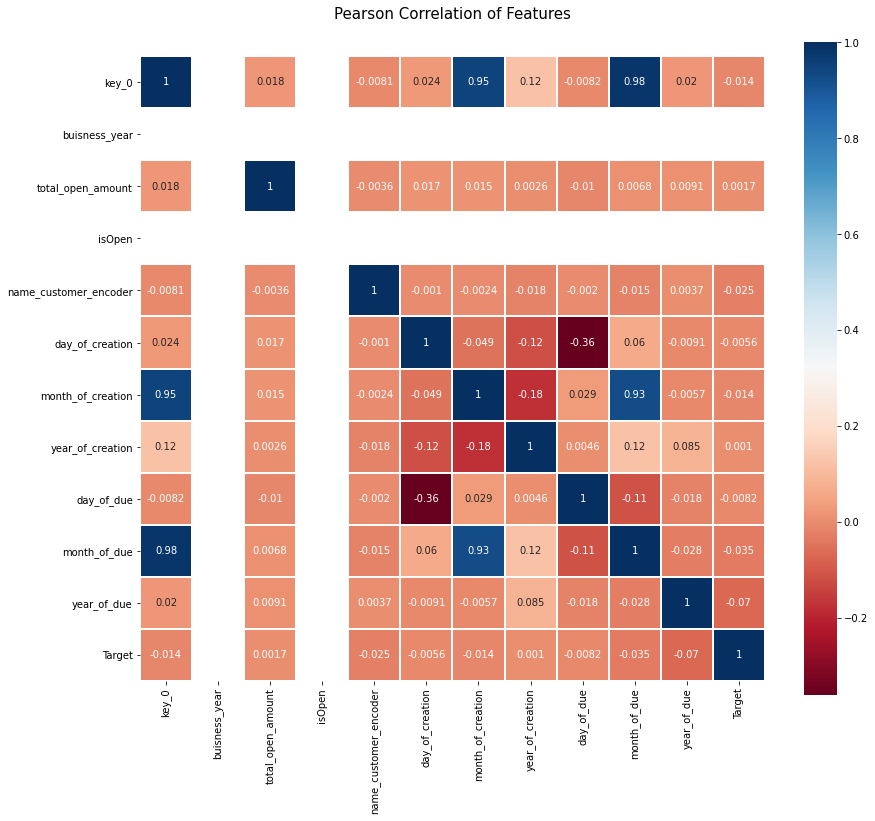

In [51]:
#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)

import matplotlib.pyplot as plt


colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [52]:
X_train.drop(['buisness_year', 'isOpen'], axis=1,)

,total_open_amount,name_customer_encoder,day_of_creation,month_of_creation,year_of_creation,day_of_due,month_of_due,year_of_due
0,9388.77,1240,30,12,2018,14,1,2019
1,48157.20,3778,30,12,2018,14,1,2019
2,2710.55,4079,30,12,2018,14,1,2019
3,13524.16,3262,30,12,2018,14,1,2019
4,2053.80,3647,30,12,2018,29,1,2019
...,...,...,...,...,...,...,...,...
27381,91321.68,1102,9,10,2019,24,10,2019
27382,47700.18,3942,9,10,2019,24,10,2019
27383,9408.35,763,9,10,2019,19,10,2019
27384,40621.81,4082,9,10,2019,24,10,2019


In [53]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27386 entries, 0 to 27385
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   buisness_year          27386 non-null  int64  
 1   total_open_amount      27386 non-null  float64
 2   isOpen                 27386 non-null  int64  
 3   name_customer_encoder  27386 non-null  int32  
 4   day_of_creation        27386 non-null  int64  
 5   month_of_creation      27386 non-null  int64  
 6   year_of_creation       27386 non-null  int64  
 7   day_of_due             27386 non-null  int64  
 8   month_of_due           27386 non-null  int64  
 9   year_of_due            27386 non-null  int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 2.2 MB
None
****************************
(27386, 10) (5869, 10) (5869, 10)
************Train Null Count****************
buisness_year            0
total_open_amount        0
isOpen                   0
name_customer

# Modelling

In [54]:
#Base Model
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [55]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_predict = base_model.predict(X_val)

In [57]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

7.631947445854397

In [58]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

In [59]:
(abs(met.Predicted-met.Actuals)/met.Actuals).mean()


inf

# Tree based model

In [60]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [61]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [62]:
y_predict2 = regressor.predict(X_val)


In [63]:
mean_squared_error(y_val, y_predict2, squared=False)

5.835039885242775

In [64]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

8.040921633857707

In [65]:
###Performing feature engg for main test to get the same set of features as selected for X_train.

In [66]:
new_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200706844,WINC,NaT,2020,1930739136.0,2020-04-03,2020-04-18,USD,31706.67,2020-04-03,NAA8,1930739136.0,1
8,U001,0200915438,GROC llc,NaT,2020,1930670473.0,2020-03-24,2020-04-08,USD,8022.50,2020-03-24,NAA8,1930670473.0,1
18,CA02,0140104409,LOB corporation,NaT,2020,2960626480.0,2020-04-06,2020-04-18,CAD,1573.92,2020-04-08,CA10,2960626480.0,1
37,U001,0200769623,WAL-MAR us,NaT,2020,1930676447.0,2020-03-20,2020-04-04,USD,200.50,2020-03-20,NAH4,1930676447.0,1
40,U001,0200769623,WAL-MAR,NaT,2020,1930623407.0,2020-03-09,2020-03-24,USD,23857.67,2020-03-09,NAH4,1930623407.0,1


In [67]:
new_test.isna().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9715
buisness_year                0
doc_id                       0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
dtype: int64

In [68]:
X_new_test = new_test.drop(['clear_date'],axis=1)
X_new_test
new_test.drop(['clear_date'], inplace =True,axis=1)

In [69]:
X_new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9715 entries, 0 to 49984
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           9715 non-null   object        
 1   cust_number             9715 non-null   object        
 2   name_customer           9715 non-null   object        
 3   buisness_year           9715 non-null   int64         
 4   doc_id                  9715 non-null   object        
 5   document_create_date.1  9715 non-null   datetime64[ns]
 6   due_in_date             9715 non-null   datetime64[ns]
 7   invoice_currency        9715 non-null   object        
 8   total_open_amount       9715 non-null   float64       
 9   baseline_create_date    9715 non-null   datetime64[ns]
 10  cust_payment_terms      9715 non-null   object        
 11  invoice_id              9715 non-null   object        
 12  isOpen                  9715 non-null   int64  

In [70]:
X_new_test.drop(['business_code','invoice_id','cust_payment_terms','invoice_currency','doc_id'],inplace =True ,axis=1)


In [71]:
X_new_test['name_customer_encoder'] = name_customer_encoder.transform(X_new_test['name_customer'])

In [72]:
X_new_test['day_of_creation'] = X_new_test['document_create_date.1'].dt.day
X_new_test['month_of_creation'] = X_new_test['document_create_date.1'].dt.month
X_new_test['year_of_creation'] = X_new_test['document_create_date.1'].dt.year

In [73]:
X_new_test['day_of_due'] = X_new_test['due_in_date'].dt.day
X_new_test['month_of_due'] = X_new_test['due_in_date'].dt.month
X_new_test['year_of_due'] = X_new_test['due_in_date'].dt.year

In [74]:
X_new_test.drop(['due_in_date'], axis =1,inplace=True)
X_new_test.drop(['document_create_date.1'], axis =1,inplace=True)
X_new_test.drop(['name_customer'], axis =1,inplace=True)
X_new_test.drop(['baseline_create_date'], axis =1,inplace=True)



In [75]:
X_new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9715 entries, 0 to 49984
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cust_number            9715 non-null   object 
 1   buisness_year          9715 non-null   int64  
 2   total_open_amount      9715 non-null   float64
 3   isOpen                 9715 non-null   int64  
 4   name_customer_encoder  9715 non-null   int32  
 5   day_of_creation        9715 non-null   int64  
 6   month_of_creation      9715 non-null   int64  
 7   year_of_creation       9715 non-null   int64  
 8   day_of_due             9715 non-null   int64  
 9   month_of_due           9715 non-null   int64  
 10  year_of_due            9715 non-null   int64  
dtypes: float64(1), int32(1), int64(8), object(1)
memory usage: 872.8+ KB


In [76]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27386 entries, 0 to 27385
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   buisness_year          27386 non-null  int64  
 1   total_open_amount      27386 non-null  float64
 2   isOpen                 27386 non-null  int64  
 3   name_customer_encoder  27386 non-null  int32  
 4   day_of_creation        27386 non-null  int64  
 5   month_of_creation      27386 non-null  int64  
 6   year_of_creation       27386 non-null  int64  
 7   day_of_due             27386 non-null  int64  
 8   month_of_due           27386 non-null  int64  
 9   year_of_due            27386 non-null  int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 2.2 MB


In [77]:
X_new_test.drop(['cust_number'], axis =1,inplace=True)

# Final Prediction for main Test

In [78]:
final_result = regressor.predict(X_new_test)

In [79]:
final_result = pd.Series(final_result,name='Target')

In [80]:
new_test.reset_index(drop=True,inplace=True)
# resetting the index of main test 

In [81]:
Final = new_test.merge(final_result , on = X_new_test.index )
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,0,U001,0200706844,WINC,2020,1930739136.0,2020-04-03,2020-04-18,USD,31706.67,2020-04-03,NAA8,1930739136.0,1,-0.062500
1,8,U001,0200915438,GROC llc,2020,1930670473.0,2020-03-24,2020-04-08,USD,8022.50,2020-03-24,NAA8,1930670473.0,1,2.038542
2,18,CA02,0140104409,LOB corporation,2020,2960626480.0,2020-04-06,2020-04-18,CAD,1573.92,2020-04-08,CA10,2960626480.0,1,1.568032
3,37,U001,0200769623,WAL-MAR us,2020,1930676447.0,2020-03-20,2020-04-04,USD,200.50,2020-03-20,NAH4,1930676447.0,1,-0.393140
4,40,U001,0200769623,WAL-MAR,2020,1930623407.0,2020-03-09,2020-03-24,USD,23857.67,2020-03-09,NAH4,1930623407.0,1,-2.480909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9710,49969,U001,0200769623,WAL-MAR corp,2020,1930768735.0,2020-04-10,2020-04-25,USD,1898.20,2020-04-10,NAH4,1930768735.0,1,-2.480909
9711,49976,U001,0200230690,DECA llc,2020,1930585735.0,2020-03-02,2020-03-24,USD,3018.22,2020-03-01,NAM4,1930585735.0,1,-5.623675
9712,49981,U001,0200705742,DOT trust,2020,1930604919.0,2020-03-05,2020-03-25,USD,20195.06,2020-03-05,NAD1,1930604919.0,1,-1.978070
9713,49982,U001,0200769623,WAL-MAR corporation,2020,1930671209.0,2020-03-19,2020-04-03,USD,68218.85,2020-03-19,NAH4,1930671209.0,1,-3.035024


In [82]:
import numpy as np
Final['Target'] = np.around(Final['Target'])
Final['Target'] = Final['Target'].astype(int)




In [83]:
Final.head()

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,0,U001,0200706844,WINC,2020,1930739136.0,2020-04-03,2020-04-18,USD,31706.67,2020-04-03,NAA8,1930739136.0,1,0
1,8,U001,0200915438,GROC llc,2020,1930670473.0,2020-03-24,2020-04-08,USD,8022.50,2020-03-24,NAA8,1930670473.0,1,2
2,18,CA02,0140104409,LOB corporation,2020,2960626480.0,2020-04-06,2020-04-18,CAD,1573.92,2020-04-08,CA10,2960626480.0,1,2
3,37,U001,0200769623,WAL-MAR us,2020,1930676447.0,2020-03-20,2020-04-04,USD,200.50,2020-03-20,NAH4,1930676447.0,1,0
4,40,U001,0200769623,WAL-MAR,2020,1930623407.0,2020-03-09,2020-03-24,USD,23857.67,2020-03-09,NAH4,1930623407.0,1,-2


# Predicted Payment Date

In [84]:
from datetime import datetime, timedelta
Final["Payment_date"]=Final["due_in_date"]+pd.to_timedelta(Final["Target"],'d')

In [85]:
Final.head()

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target,Payment_date
0,0,U001,0200706844,WINC,2020,1930739136.0,2020-04-03,2020-04-18,USD,31706.67,2020-04-03,NAA8,1930739136.0,1,0,2020-04-18
1,8,U001,0200915438,GROC llc,2020,1930670473.0,2020-03-24,2020-04-08,USD,8022.50,2020-03-24,NAA8,1930670473.0,1,2,2020-04-10
2,18,CA02,0140104409,LOB corporation,2020,2960626480.0,2020-04-06,2020-04-18,CAD,1573.92,2020-04-08,CA10,2960626480.0,1,2,2020-04-20
3,37,U001,0200769623,WAL-MAR us,2020,1930676447.0,2020-03-20,2020-04-04,USD,200.50,2020-03-20,NAH4,1930676447.0,1,0,2020-04-04
4,40,U001,0200769623,WAL-MAR,2020,1930623407.0,2020-03-09,2020-03-24,USD,23857.67,2020-03-09,NAH4,1930623407.0,1,-2,2020-03-22


In [86]:
Final.to_csv("Final.csv")